# Working with documents
In this lesson, we will learn how to work with documents.


## Nvidia Financial Report
The first document that we will use is the Nvidia CFO Commentary on Second Quarter Fiscal 2025 Results.

The first page is a table containing financial information. Pages 2-4 is the CFO commentary. We will extract the text from the second page and analyze it, before moving on to the first page to extract the financial information.

We will make use of some LlamaIndex tools. Throughout this Module, we will work with LlamaIndex, which has some nice features that make it easy to work with documents. The first tool is the `PyMuPDFReader` class, which is a wrapper around the `fitz` library. This allows us to read text from a PDF document.

In [14]:
from llama_index.readers.file import PyMuPDFReader
from pydantic import BaseModel, Field
from openai import OpenAI

from rich.pretty import pprint
from utils import TemplateManager

import os
import dotenv

dotenv.load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [2]:
loader = PyMuPDFReader()
documents = loader.load(file_path="data/nvidia-commentary.pdf")

In [3]:
documents

[Document(id_='92c01183-79b1-4f8a-bf79-1afca15a1b6d', embedding=None, metadata={'total_pages': 8, 'file_path': 'data/nvidia-commentary.pdf', 'source': '1'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text=' \n \n \n \n \n \n \n                 \nCFO Commentary on Second Quarter Fiscal 2025 Results\nQ2 Fiscal 2025 Summary\nGAAP\n($ in millions, except earnings per \nshare)\nQ2 FY25\nQ1 FY25\nQ2 FY24\nQ/Q\nY/Y\nRevenue\n$30,040\n$26,044\n$13,507\nUp 15%\nUp 122%\nGross margin\n 75.1 %\n 78.4 %\n 70.1 %\nDown 3.3 pts\nUp 5.0 pts\nOperating expenses\n$3,932\n$3,497\n$2,662\nUp 12%\nUp 48%\nOperating income\n$18,642\n$16,909\n$6,800\nUp 10%\nUp 174%\nNet income\n$16,599\n$14,881\n$6,188\nUp 12%\nUp 168%\nDiluted earnings per share\n$0.67\n$0.60\n$0.25\nUp 12%\nUp 168%\nNon-GAAP\n($ in millions, except earnings per \nshare)\nQ2 FY25\nQ1 FY25\nQ2 FY24\nQ/Q\nY/Y\nRevenue\n$30,040\n$26,044\n$13,507\nUp 15%\nUp 122%\nGross margin\n 75.7 %\n 78.9 %\n 71.2 %\

We see that we get a list of `Document` objects. Let's take a look at the first document.

In [3]:
pprint(documents[0])

Document(
│   id_='2bd9d17e-1467-4377-8fab-8651150b1d35',
│   embedding=None,
│   metadata={'total_pages': 8, 'file_path': 'data/nvidia-commentary.pdf', 'source': '1'},
│   excluded_embed_metadata_keys=[],
│   excluded_llm_metadata_keys=[],
│   relationships={},
│   metadata_template='{key}: {value}',
│   metadata_separator='\n',
│   text_resource=MediaResource(
│   │   embeddings=None,
│   │   data=None,
│   │   text=' \n \n \n \n \n \n \n                 \nCFO Commentary on Second Quarter Fiscal 2025 Results\nQ2 Fiscal 2025 Summary\nGAAP\n($ in millions, except earnings per \nshare)\nQ2 FY25\nQ1 FY25\nQ2 FY24\nQ/Q\nY/Y\nRevenue\n$30,040\n$26,044\n$13,507\nUp 15%\nUp 122%\nGross margin\n 75.1 %\n 78.4 %\n 70.1 %\nDown 3.3 pts\nUp 5.0 pts\nOperating expenses\n$3,932\n$3,497\n$2,662\nUp 12%\nUp 48%\nOperating income\n$18,642\n$16,909\n$6,800\nUp 10%\nUp 174%\nNet income\n$16,599\n$14,881\n$6,188\nUp 12%\nUp 168%\nDiluted earnings per share\n$0.67\n$0.60\n$0.25\nUp 12%\nUp 168%\nNon-GAAP\n($ in millions, except earnings per \nshare)\nQ2 FY25\nQ1 FY25\nQ2 FY24\nQ/Q\nY/Y\nRevenue\n$30,040\n$26,044\n$13,507\nUp 15%\nUp 122%\nGross margin\n 75.7 %\n 78.9 %\n 71.2 %\nDown 3.2 pts\nUp 4.5 pts\nOperating expenses\n$2,792\n$2,501\n$1,838\nUp 12%\nUp 52%\nOperating income\n$19,937\n$18,059\n$7,776\nUp 10%\nUp 156%\nNet income\n$16,952\n$15,238\n$6,740\nUp 11%\nUp 152%\nDiluted earnings per share\n$0.68\n$0.61\n$0.27\nUp 11%\nUp 152%\nRevenue by Reportable Segments\n($ in millions)\nQ2 FY25\nQ1 FY25\nQ2 FY24\nQ/Q\nY/Y\nCompute & Networking\n$26,446\n$22,675\n$10,402\nUp 17%\nUp 154%\nGraphics\n3,594\n3,369\n3,105\nUp 7%\nUp 16%\nTotal\n$30,040\n$26,044\n$13,507\nUp 15%\nUp 122%\nRevenue by Market Platform\n($ in millions)\nQ2 FY25\nQ1 FY25\nQ2 FY24\nQ/Q\nY/Y\nData Center\n$26,272\n$22,563\n$10,323\nUp 16%\nUp 154%\nCompute\n22,604\n19,392\n8,612\nUp 17%\nUp 162%\nNetworking\n3,668\n3,171\n1,711\nUp 16%\nUp 114%\nGaming\n2,880\n2,647\n2,486\nUp 9%\nUp 16%\nProfessional Visualization\n454\n427\n379\nUp 6%\nUp 20%\nAutomotive\n346\n329\n253\nUp 5%\nUp 37%\nOEM and Other\n88\n78\n66\nUp 13%\nUp 33%\nTotal\n$30,040\n$26,044\n$13,507\nUp 15%\nUp 122%\n',
│   │   path=None,
│   │   url=None,
│   │   mimetype=None
│   ),
│   image_resource=None,
│   audio_resource=None,
│   video_resource=None,
│   text_template='{metadata_str}\n\n{content}'
)

Each document has (among other things):

- A unique identifier `id_`
- An `embedding`, if indeed it was embedded
- Some `metadata` indicating things like:
    - Number of pages
    - File path
- The `text` itself

In [4]:
print(documents[1].text)

We specialize in markets where our computing platforms can provide tremendous acceleration for 
applications. These platforms incorporate processors, interconnects, software, algorithms, systems 
and services to deliver unique value. Our platforms address four large markets where our expertise is 
critical: Data Center, Gaming, Professional Visualization, and Automotive.
On June 7, 2024, we completed a 10-for-1 forward stock split. All share and per share amounts 
presented have been retroactively adjusted to reflect the stock split.
Revenue
Revenue was a record $30.0 billion, up 122% from a year ago and up 15% sequentially.
Data Center revenue was a record, up 154% from a year ago and up 16% sequentially. The strong 
sequential and year-on-year growth was driven by demand for our Hopper GPU computing platform 
for training and inferencing of large language models, recommendation engines, and generative AI 
applications. Sequential growth was driven by consumer internet and enterprise 

We first break the document up into multiple sections. The first section is the table on the first page. The second section is the CFO commentary on pages 2-4. Finally, all the financial information in the last section.

In [5]:
summary_table = documents[0].text
text = documents[1:3]
table_text = documents[5:]

cfo_summary = ""
financials = ""

for doc in text:
    cfo_summary += doc.text

for table in table_text:
    financials += table.text

## CFO Commentary
Probably the most naive way of giving an LLM extra information is to simply stuff it all into the model context. This technique is perhaps unsurprisingly called "stuffing"!

We want to extract some key figures and information from the document:

- Revenue
- Accounts receivable
- Cash and securities
- Inventory
- Dividends
- General outlook (a short paragraph about the future outlook)

Here is the jinja template:

---
```jinja
You are an expert at extracting information from financial documents. You will be shown a commentary on Quarter Fiscal results. You will extract the following information:

- Revenue
- Accounts receivable
- Cash and securities
- Inventory
- Dividends
- General outlook

If the information is given in terms of billions of dollars, you will convert it to an interger value. For example, if the value is given as 1.5 billion, you will convert it to 1500000000.

Provide the information in JSON format.

Here is the schema:

{{ schema }}

```
---

### Pydantic Object
We create a pydantic object to parse the JSON output.

In [6]:
class Commentary(BaseModel):
    revenue: int = Field(0, description="Revenue")
    accounts_receivable: int = Field(0, description="Accounts Receivable")
    cash_and_securities: int = Field(0, description="Cash and Securities")
    inventory: int = Field(0, description="Inventory")
    dividends: int = Field(0, description="Dividends")
    general_outlook: str = Field("unknown", description="General Outlook")


In [7]:
commentary = Commentary()
pprint(commentary, expand_all=True)

Commentary(
│   revenue=0,
│   accounts_receivable=0,
│   cash_and_securities=0,
│   inventory=0,
│   dividends=0,
│   general_outlook='unknown'
)

We will use the `TemplateManager` class from the last module to render the jinja template.

In [8]:
template_manager = TemplateManager('./prompts')

In [9]:
system_commentary_prompt = template_manager.render(
    'system_commentary.jinja',
    schema=commentary.model_json_schema()
)

In [10]:
print(system_commentary_prompt)

You are an expert at extracting information from financial documents. You will be shown a commentary on Quarter Fiscal results. You will extract the following information:

- Revenue
- Accounts receivable
- Cash and securities
- Inventory
- Dividends
- General outlook

If the information is given in terms of billions of dollars, you will convert it to an interger value. For example, if the value is given as 1.5 billion, you will convert it to 1500000000.

Provide the information in JSON format.

Here is the schema:

{'properties': {'revenue': {'default': 0, 'description': 'Revenue', 'title': 'Revenue', 'type': 'integer'}, 'accounts_receivable': {'default': 0, 'description': 'Accounts Receivable', 'title': 'Accounts Receivable', 'type': 'integer'}, 'cash_and_securities': {'default': 0, 'description': 'Cash and Securities', 'title': 'Cash And Securities', 'type': 'integer'}, 'inventory': {'default': 0, 'description': 'Inventory', 'title': 'Inventory', 'type': 'integer'}, 'dividends': {'d

In [ ]:
client = OpenAI(api_key=OPENAI_API_KEY)

def generate(system: str, text: str, **kwargs) -> str:
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages = [
            {"role": "system", "content": system},
            {"role": "user", "content": text},
        ],
        **kwargs
    )

    return response

In [16]:
response = generate(system_commentary_prompt, cfo_summary, response_format={ "type": "json_object" }).choices[0].message.content

import json
nvidia_commentary = Commentary(**json.loads(response))

In [17]:
pprint(nvidia_commentary)

Commentary(
│   revenue=30000000000,
│   accounts_receivable=14100000000,
│   cash_and_securities=34800000000,
│   inventory=6700000000,
│   dividends=246000000,
│   general_outlook='Revenue is expected to be $32.5 billion, plus or minus 2%. GAAP and non-GAAP gross margins are expected to be 74.4% and 75.0%, respectively, plus or minus 50 basis points. For the full year, gross margins are expected to be in the mid-70% range. GAAP and non-GAAP operating expenses are expected to be approximately $4.3 billion and $3.0 billion, respectively. Full-year operating expenses are expected to grow in the mid to upper 40% range.'
)

OK, so this is impressive. But it's relatively straight forward to extract this information from the document. Let's try something a little tougher...

## Summary table
The first page of the document contains a table with a summary financial information. Let's see if we can extract the information from the table into a markdown format. We write a prompt specifically aimed at extracting this information.

---
```jinja
You are an expert in extracting financial tables from unstructured text. You will be given a table in a pdf document and you need to output the extracted data in Markdown format.
```
---

In [18]:
system_table_prompt = template_manager.render(
    'system_table.jinja'
)

print(system_table_prompt)

You are an expert in extracting financial tables from unstructured text. You will be given a table in a pdf document and you need to output the extracted data in Markdown format.


We set the temperature low to avoid any "creativity".

In [19]:
response = generate(system_table_prompt, summary_table, temperature=0.0)

In [20]:
print(response.choices[0].message.content)

## Q2 Fiscal 2025 Summary

### GAAP
| ($ in millions, except earnings per share) | Q2 FY25 | Q1 FY25 | Q2 FY24 | Q/Q   | Y/Y   |
|--------------------------------------------|---------|---------|---------|-------|-------|
| Revenue                                    | $30,040 | $26,044 | $13,507 | Up 15%| Up 122%|
| Gross margin                               | 75.1 %  | 78.4 %  | 70.1 %  | Down 3.3 pts | Up 5.0 pts |
| Operating expenses                         | $3,932  | $3,497  | $2,662  | Up 12%| Up 48% |
| Operating income                           | $18,642 | $16,909 | $6,800  | Up 10%| Up 174%|
| Net income                                 | $16,599 | $14,881 | $6,188  | Up 12%| Up 168%|
| Diluted earnings per share                 | $0.67   | $0.60   | $0.25   | Up 12%| Up 168%|

### Non-GAAP
| ($ in millions, except earnings per share) | Q2 FY25 | Q1 FY25 | Q2 FY24 | Q/Q   | Y/Y   |
|--------------------------------------------|---------|---------|---------|-------|-------|
| R

Let's put this into a markdown cell.

## CFO Commentary on Second Quarter Fiscal 2025 Results

### Q2 Fiscal 2025 Summary

#### GAAP
| ($ in millions, except earnings per share) | Q2 FY25 | Q1 FY25 | Q2 FY24 | Q/Q   | Y/Y   |
|--------------------------------------------|---------|---------|---------|-------|-------|
| Revenue                                    | $30,040 | $26,044 | $13,507 | Up 15%| Up 122%|
| Gross margin                               | 75.1 %  | 78.4 %  | 70.1 %  | Down 3.3 pts | Up 5.0 pts |
| Operating expenses                         | $3,932  | $3,497  | $2,662  | Up 12%| Up 48% |
| Operating income                           | $18,642 | $16,909 | $6,800  | Up 10%| Up 174%|
| Net income                                 | $16,599 | $14,881 | $6,188  | Up 12%| Up 168%|
| Diluted earnings per share                 | $0.67   | $0.60   | $0.25   | Up 12%| Up 168%|

#### Non-GAAP
| ($ in millions, except earnings per share) | Q2 FY25 | Q1 FY25 | Q2 FY24 | Q/Q   | Y/Y   |
|--------------------------------------------|---------|---------|---------|-------|-------|
| Revenue                                    | $30,040 | $26,044 | $13,507 | Up 15%| Up 122%|
| Gross margin                               | 75.7 %  | 78.9 %  | 71.2 %  | Down 3.2 pts | Up 4.5 pts |
| Operating expenses                         | $2,792  | $2,501  | $1,838  | Up 12%| Up 52% |
| Operating income                           | $19,937 | $18,059 | $7,776  | Up 10%| Up 156%|
| Net income                                 | $16,952 | $15,238 | $6,740  | Up 11%| Up 152%|
| Diluted earnings per share                 | $0.68   | $0.61   | $0.27   | Up 11%| Up 152%|

### Revenue by Reportable Segments
| ($ in millions)        | Q2 FY25 | Q1 FY25 | Q2 FY24 | Q/Q   | Y/Y   |
|------------------------|---------|---------|---------|-------|-------|
| Compute & Networking   | $26,446 | $22,675 | $10,402 | Up 17%| Up 154%|
| Graphics               | $3,594  | $3,369  | $3,105  | Up 7% | Up 16% |
| Total                  | $30,040 | $26,044 | $13,507 | Up 15%| Up 122%|

### Revenue by Market Platform
| ($ in millions)            | Q2 FY25 | Q1 FY25 | Q2 FY24 | Q/Q   | Y/Y   |
|----------------------------|---------|---------|---------|-------|-------|
| Data Center                | $26,272 | $22,563 | $10,323 | Up 16%| Up 154%|
| Compute                    | $22,604 | $19,392 | $8,612  | Up 17%| Up 162%|
| Networking                 | $3,668  | $3,171  | $1,711  | Up 16%| Up 114%|
| Gaming                     | $2,880  | $2,647  | $2,486  | Up 9% | Up 16% |
| Professional Visualization | $454    | $427    | $379    | Up 6% | Up 20% |
| Automotive                 | $346    | $329    | $253    | Up 5% | Up 37% |
| OEM and Other              | $88     | $78     | $66     | Up 13%| Up 33% |
| Total                      | $30,040 | $26,044 | $13,507 | Up 15%| Up 122%|


Compare this to the pdf version and see if there are any discrepancies. You'll probably find that this works really quite well. What would be really useful is if the model could convert this information into a more structured format.

In [21]:
system_json_prompt = template_manager.render(
    'json_prompt.jinja', force_reload=True
)

print(system_json_prompt)

You are an expert at converting markdown into JSON. You will be shown a markdown file with a table. You will then convert the table into the appropriate JSON format.

Remove all the markdown syntax. Remove all '$' and '%' and 'pts' symbols, and include them in the key instead. For example "Q/Q" : "10%" should be "Q/Q (%)": 10.

If a value is 'Up x' then the value should be positive, and if a value is 'Down x', then the value should negative. Any numerical values should be convertable to floats.

Provide the output in valid JSON format.


In [ ]:
json_response = generate(system_json_prompt, response.choices[0].message.content, response_format={ "type": "json_object" }).choices[0].message.content

In [40]:
# dump the json response to a file
with open('data/nvidia_commentary.json', 'w') as f:
    json.dump(json.loads(json_response), f)

In [39]:
pprint(json.loads(json_response))

{
│   'GAAP': [
│   │   {
│   │   │   'Description': 'Revenue',
│   │   │   'Q2 FY25': 30040,
│   │   │   'Q1 FY25': 26044,
│   │   │   'Q2 FY24': 13507,
│   │   │   'Q/Q (%)': 15,
│   │   │   'Y/Y (%)': 122
│   │   },
│   │   {
│   │   │   'Description': 'Gross margin (%)',
│   │   │   'Q2 FY25': 75.1,
│   │   │   'Q1 FY25': 78.4,
│   │   │   'Q2 FY24': 70.1,
│   │   │   'Q/Q (pts)': -3.3,
│   │   │   'Y/Y (pts)': 5.0
│   │   },
│   │   {
│   │   │   'Description': 'Operating expenses',
│   │   │   'Q2 FY25': 3932,
│   │   │   'Q1 FY25': 3497,
│   │   │   'Q2 FY24': 2662,
│   │   │   'Q/Q (%)': 12,
│   │   │   'Y/Y (%)': 48
│   │   },
│   │   {
│   │   │   'Description': 'Operating income',
│   │   │   'Q2 FY25': 18642,
│   │   │   'Q1 FY25': 16909,
│   │   │   'Q2 FY24': 6800,
│   │   │   'Q/Q (%)': 10,
│   │   │   'Y/Y (%)': 174
│   │   },
│   │   {
│   │   │   'Description': 'Net income',
│   │   │   'Q2 FY25': 16599,
│   │   │   'Q1 FY25': 14881,
│   │   │   'Q2 FY24': 6188,
│   │   │   'Q/Q (%)': 12,
│   │   │   'Y/Y (%)': 168
│   │   },
│   │   {
│   │   │   'Description': 'Diluted earnings per share',
│   │   │   'Q2 FY25': 0.67,
│   │   │   'Q1 FY25': 0.6,
│   │   │   'Q2 FY24': 0.25,
│   │   │   'Q/Q (%)': 12,
│   │   │   'Y/Y (%)': 168
│   │   }
│   ],
│   'Non-GAAP': [
│   │   {
│   │   │   'Description': 'Revenue',
│   │   │   'Q2 FY25': 30040,
│   │   │   'Q1 FY25': 26044,
│   │   │   'Q2 FY24': 13507,
│   │   │   'Q/Q (%)': 15,
│   │   │   'Y/Y (%)': 122
│   │   },
│   │   {
│   │   │   'Description': 'Gross margin (%)',
│   │   │   'Q2 FY25': 75.7,
│   │   │   'Q1 FY25': 78.9,
│   │   │   'Q2 FY24': 71.2,
│   │   │   'Q/Q (pts)': -3.2,
│   │   │   'Y/Y (pts)': 4.5
│   │   },
│   │   {
│   │   │   'Description': 'Operating expenses',
│   │   │   'Q2 FY25': 2792,
│   │   │   'Q1 FY25': 2501,
│   │   │   'Q2 FY24': 1838,
│   │   │   'Q/Q (%)': 12,
│   │   │   'Y/Y (%)': 52
│   │   },
│   │   {
│   │   │   'Description': 'Operating income',
│   │   │   'Q2 FY25': 19937,
│   │   │   'Q1 FY25': 18059,
│   │   │   'Q2 FY24': 7776,
│   │   │   'Q/Q (%)': 10,
│   │   │   'Y/Y (%)': 156
│   │   },
│   │   {
│   │   │   'Description': 'Net income',
│   │   │   'Q2 FY25': 16952,
│   │   │   'Q1 FY25': 15238,
│   │   │   'Q2 FY24': 6740,
│   │   │   'Q/Q (%)': 11,
│   │   │   'Y/Y (%)': 152
│   │   },
│   │   {
│   │   │   'Description': 'Diluted earnings per share',
│   │   │   'Q2 FY25': 0.68,
│   │   │   'Q1 FY25': 0.61,
│   │   │   'Q2 FY24': 0.27,
│   │   │   'Q/Q (%)': 11,
│   │   │   'Y/Y (%)': 152
│   │   }
│   ],
│   'Revenue by Reportable Segments': [
│   │   {
│   │   │   'Description': 'Compute & Networking',
│   │   │   'Q2 FY25': 26446,
│   │   │   'Q1 FY25': 22675,
│   │   │   'Q2 FY24': 10402,
│   │   │   'Q/Q (%)': 17,
│   │   │   'Y/Y (%)': 154
│   │   },
│   │   {
│   │   │   'Description': 'Graphics',
│   │   │   'Q2 FY25': 3594,
│   │   │   'Q1 FY25': 3369,
│   │   │   'Q2 FY24': 3105,
│   │   │   'Q/Q (%)': 7,
│   │   │   'Y/Y (%)': 16
│   │   },
│   │   {
│   │   │   'Description': 'Total',
│   │   │   'Q2 FY25': 30040,
│   │   │   'Q1 FY25': 26044,
│   │   │   'Q2 FY24': 13507,
│   │   │   'Q/Q (%)': 15,
│   │   │   'Y/Y (%)': 122
│   │   }
│   ],
│   'Revenue by Market Platform': [
│   │   {
│   │   │   'Description': 'Data Center',
│   │   │   'Q2 FY25': 26272,
│   │   │   'Q1 FY25': 22563,
│   │   │   'Q2 FY24': 10323,
│   │   │   'Q/Q (%)': 16,
│   │   │   'Y/Y (%)': 154
│   │   },
│   │   {
│   │   │   'Description': 'Compute',
│   │   │   'Q2 FY25': 22604,
│   │   │   'Q1 FY25': 19392,
│   │   │   'Q2 FY24': 8612,
│   │   │   'Q/Q (%)': 17,
│   │   │   'Y/Y (%)': 162
│   │   },
│   │   {
│   │   │   'Description': 'Networking',
│   │   │   'Q2 FY25': 3668,
│   │   │   'Q1 FY25': 3171,
│   │   │   'Q2 FY24': 1711,
│   │   │   'Q/Q (%)': 16,
│   │   │   'Y/Y (%)': 114
│   │   },
│   │   {'Description': 'Gaming', 'Q2 FY25': 2880, 'Q1 FY25': 2647, 'Q2 FY24': 2486, 'Q/Q (%)': 9, 'Y/Y (%)': 16},
│   

That is quite astonishing.

Can I go direct from the pdf to json? Let's try it!

## Balance sheet

Let's get the full balance sheet.

In [42]:
response = generate(system_table_prompt, financials, temperature=0.0)

In [44]:
print(response.choices[0].message.content)

```markdown
# NVIDIA CORPORATION
## RECONCILIATION OF GAAP TO NON-GAAP FINANCIAL MEASURES
*(In millions, except per share data)*  
*(Unaudited)*

### Three Months Ended

| Description                              | July 28, 2024 | April 28, 2024 | July 30, 2023 |
|------------------------------------------|---------------|---------------|---------------|
| **GAAP gross profit**                    | $22,574       | $20,406       | $9,462        |
| **GAAP gross margin**                    | 75.1%         | 78.4%         | 70.1%         |
| Acquisition-related and other costs (A)  | 118           | 119           | 119           |
| Stock-based compensation expense (B)     | 40            | 36            | 31            |
| Other (C)                                | (3)           | (1)           | 2             |
| **Non-GAAP gross profit**                | $22,729       | $20,560       | $9,614        |
| **Non-GAAP gross margin**                | 75.7%         | 78.9%         | 71.2%   

# NVIDIA CORPORATION
## RECONCILIATION OF GAAP TO NON-GAAP FINANCIAL MEASURES
*(In millions, except per share data)*  
*(Unaudited)*  

### Three Months Ended
| Metric                                   | July 28, 2024 | April 28, 2024 | July 30, 2023 |
|------------------------------------------|----------------|----------------|----------------|
| GAAP gross profit                        | $22,574        | $20,406        | $9,462         |
| GAAP gross margin                        | 75.1%          | 78.4%          | 70.1%          |
| Acquisition-related and other costs (A)  | $118           | $119           | $119           |
| Stock-based compensation expense (B)    | $40            | $36            | $31            |
| Other (C)                               | $(3)           | $(1)           | $2             |
| Non-GAAP gross profit                   | $22,729        | $20,560        | $9,614         |
| Non-GAAP gross margin                   | 75.7%          | 78.9%          | 71.2%          |
| GAAP operating expenses                  | $3,932         | $3,497         | $2,662         |
| Stock-based compensation expense (B)    | $(1,114)       | $(975)         | $(811)         |
| Acquisition-related and other costs (A) | $(26)          | $(21)          | $(18)          |
| Other (C)                               | $0             | $0             | $5             |
| Non-GAAP operating expenses               | $2,792         | $2,501         | $1,838         |
| GAAP operating income                    | $18,642        | $16,909        | $6,800         |
| Total impact of non-GAAP adjustments to operating income | $1,295 | $1,150 | $976 |
| Non-GAAP operating income                | $19,937        | $18,059        | $7,776         |
| GAAP other income (expense), net        | $572           | $370           | $181           |
| Gains from non-affiliated investments and publicly-held equity securities, net | $(193) | $(69) | $(62) |
| Interest expense related to amortization of debt discount | $1 | $1 | $1 |
| Non-GAAP other income (expense), net    | $380           | $302           | $120           |
| GAAP net income                          | $16,599        | $14,881        | $6,188         |
| Total pre-tax impact of non-GAAP adjustments | $1,103     | $1,082         | $915           |
| Income tax impact of non-GAAP adjustments (D) | $(750)    | $(725)         | $(363)         |
| Non-GAAP net income                      | $16,952        | $15,238        | $6,740         |

### Six Months Ended
| Metric                                   | July 28, 2024 | July 30, 2023 |
|------------------------------------------|----------------|----------------|
| GAAP gross profit                        | $42,979        | $14,110        |
| GAAP gross margin                        | 76.6%          | 68.2%          |
| Acquisition-related and other costs (A)  | $238           | $239           |
| Stock-based compensation expense (B)    | $75            | $58            |
| Other (C)                               | $(4)           | $10            |
| Non-GAAP gross profit                   | $43,288        | $14,417        |
| Non-GAAP gross margin                   | 77.2%          | 69.7%          |
| GAAP operating expenses                  | $7,428         | $5,169         |
| Stock-based compensation expense (B)    | $(2,089)       | $(1,518)       |
| Acquisition-related and other costs (A) | $(48)          | $(72)          |
| Other (C)                               | $0             | $10            |
| Non-GAAP operating expenses               | $5,291         | $3,589         |
| GAAP operating income                    | $35,551        | $8,941         |
| Total impact of non-GAAP adjustments to operating income | $2,446 | $1,887 |
| Non-GAAP operating income                | $37,997        | $10,828        |
| GAAP other income (expense), net        | $942           | $249           |
| Gains from non-affiliated investments and publicly-held equity securities, net | $(264) | $(46) |
| Interest expense related to amortization of debt discount | $2 | $2 |
| Non-GAAP other income (expense), net    | $680           | $205           |
| GAAP net income                          | $31,480        | $8,232         |
| Total pre-tax impact of non-GAAP adjustments | $2,184     | $1,843         |
| Income tax impact of non-GAAP adjustments (D) | $(1,475) | $(622)         |
| Non-GAAP net income                      | $32,189        | $9,453         |

### Diluted net income per share
| Metric                                   | July 28, 2024 | April 28, 2024 | July 30, 2023 |
|------------------------------------------|----------------|----------------|----------------|
| GAAP                                     | $0.67          | $0.60          | $0.25          |
| Non-GAAP                                 | $0.68          | $0.61          | $0.27          |
| Weighted average shares used in diluted net income per share computation | 24,848 | 24,890 | 24,994 |

### GAAP net cash provided by operating activities
| Metric                                   | July 28, 2024 | April 28, 2024 | July 30, 2023 |
|------------------------------------------|----------------|----------------|----------------|
| GAAP net cash provided by operating activities | $14,489 | $15,345 | $6,348 |
| Purchases related to property and equipment and intangible assets | $(977) | $(369) | $(289) |
| Principal payments on property and equipment and intangible assets | $(29) | $(40) | $(11) |
| Free cash flow                           | $13,483        | $14,936        | $6,048         |

### Notes
- (A) Acquisition-related and other costs are comprised of amortization of intangible assets, transaction costs, and certain compensation charges.
- (B) Stock-based compensation consists of costs related to revenue, research and development, and sales, general and administrative.
- (C) Other consists of IP-related costs and assets held for sale related adjustments.
- (D) Income tax impact of non-GAAP adjustments, including the recognition of excess tax benefits or deficiencies related to stock-based compensation under GAAP accounting standard (ASU 2016-09).

## RECONCILIATION OF GAAP TO NON-GAAP OUTLOOK
### Q3 FY2025 Outlook
| Metric                                   | Amount         |
|------------------------------------------|----------------|
| GAAP gross margin                        | 74.4%          |
| Impact of stock-based compensation expense, acquisition-related costs, and other costs | 0.6% |
| Non-GAAP gross margin                   | 75.0%          |
| GAAP operating expenses                  | $4,250         |
| Stock-based compensation expense, acquisition-related costs, and other costs | $(1,250) |
| Non-GAAP operating expenses               | $3,000         |

OK...that's pretty good!

## Attention is not always enough...

Now let's look at some documents that are more complicated...

In [45]:
attention = loader.load(file_path="data/attention.pdf")

There are 4 tables in this paper. Let's see if we can extract these tables and save them in markdown format.

We will approach this in a multi-stage way:

For each page in the paper:
1. Determine whether or not there is a table on this page. The LLM takes as input the text of the page and outputs a boolean value.

2. If the LLM outputs True, then we will use another LLM to extract the table from the page. The LLM takes as input the text of the page and outputs the table in markdown format.

3. Save the table in markdown format.

In [44]:
attention = loader.load(file_path="data/attention.pdf")

Tables occur on pages 6, 8, 9, and 10.

In [46]:
import numpy as np

targets = np.zeros(len(attention))
targets[[5,7,8,9]] = 1

In [47]:
attention[0].text

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurrence

We write a prompt to find the pages with tables:

---
```jinja
You are an expert in finding tables in documents. You will be shown a page from a document and you will indicate whether or not a table exists within that document.

Output only a 0 for no table and a 1 for a table.
    
For the following page, is there a table present?
```

In [55]:
results = np.zeros(len(attention))
for i, page in enumerate(attention):
    table_find_prompt = template_manager.render(
        'table_find.jinja',
    )

    response = generate(table_find_prompt, page.text, temperature=0.7)

    results[i] = int(response.choices[0].message.content)

In [56]:
print(
    "Tables found on pages: "
    + ", ".join([str(i + 1) for i, v in enumerate(results) if v])
)

Tables found on pages: 4, 6, 7, 8, 9, 10


Let's put those pages into the model again and see if we can extract the table as markdown and save it to a .md file.

In [57]:
# get the pages from attention where there are tables
table_pages = [page for i, page in enumerate(attention) if results[i]]

In [61]:
results = np.zeros(len(attention))
for i, page in enumerate(table_pages):
    table_find_prompt = template_manager.render(
        'table_extract.jinja',
    )

    response = generate(table_find_prompt, page.text, temperature=0.0).choices[0].message.content

    # remove markdown formatting if they exist
    response = response.replace("```", "")
    response = response.replace("```markdown", "")

    # save the table as a .md
    with open(f'data/tables/page_{i + 1}.md', 'w') as f:
        f.write(response)


So this does not go as well as we had hoped. Let's try using Table Transformer, a Microsoft tool that is specifically designed for extracting tables from documents.

## Table Transformer

In [64]:

import matplotlib.pyplot as plt
import io
from PIL import Image

from torchvision import transforms

from transformers import AutoModelForObjectDetection
import torch
import os
import fitz

/Users/rkd/Antipodes-Intelligence/spark-llms/Course2/Module2/v1-llm02-m2-01/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The following is just a bunch of processing code.

In [76]:
class MaxResize(object):
    def __init__(self, max_size=800):
        self.max_size = max_size

    def __call__(self, image):
        width, height = image.size
        current_max_size = max(width, height)
        scale = self.max_size / current_max_size
        resized_image = image.resize(
            (int(round(scale * width)), int(round(scale * height)))
        )

        return resized_image


detection_transform = transforms.Compose(
    [
        MaxResize(800),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

structure_transform = transforms.Compose(
    [
        MaxResize(1000),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

# load table detection model
# processor = TableTransformerImageProcessor(max_size=800)
model = AutoModelForObjectDetection.from_pretrained(
    "microsoft/table-transformer-detection", revision="no_timm"
)

# load table structure recognition model
# structure_processor = TableTransformerImageProcessor(max_size=1000)
structure_model = AutoModelForObjectDetection.from_pretrained(
    "microsoft/table-transformer-structure-recognition-v1.1-all"
)


# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(-1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h), (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)


def rescale_bboxes(out_bbox, size):
    width, height = size
    boxes = box_cxcywh_to_xyxy(out_bbox)
    boxes = boxes * torch.tensor(
        [width, height, width, height], dtype=torch.float32
    )
    return boxes


def outputs_to_objects(outputs, img_size, id2label):
    m = outputs.logits.softmax(-1).max(-1)
    pred_labels = list(m.indices.detach().cpu().numpy())[0]
    pred_scores = list(m.values.detach().cpu().numpy())[0]
    pred_bboxes = outputs["pred_boxes"].detach().cpu()[0]
    pred_bboxes = [
        elem.tolist() for elem in rescale_bboxes(pred_bboxes, img_size)
    ]

    objects = []
    for label, score, bbox in zip(pred_labels, pred_scores, pred_bboxes):
        class_label = id2label[int(label)]
        if not class_label == "no object":
            objects.append(
                {
                    "label": class_label,
                    "score": float(score),
                    "bbox": [float(elem) for elem in bbox],
                }
            )

    return objects


def detect_and_crop_save_table(
    file_path, cropped_table_directory="./table_images/"
):
    image = Image.open(file_path)

    filename, _ = os.path.splitext(file_path.split("/")[-1])

    if not os.path.exists(cropped_table_directory):
        os.makedirs(cropped_table_directory)

    # prepare image for the model
    # pixel_values = processor(image, return_tensors="pt").pixel_values
    pixel_values = detection_transform(image).unsqueeze(0)

    # forward pass
    with torch.no_grad():
        outputs = model(pixel_values)

    # postprocess to get detected tables
    id2label = model.config.id2label
    id2label[len(model.config.id2label)] = "no object"
    detected_tables = outputs_to_objects(outputs, image.size, id2label)

    print(f"number of tables detected {len(detected_tables)}")

    for idx in range(len(detected_tables)):
        #   # crop detected table out of image
        cropped_table = image.crop(detected_tables[idx]["bbox"])
        cropped_table.save(f"./{cropped_table_directory}/{filename}_{idx}.png")


In [68]:
pdf_file = "data/attention.pdf"

# Split the base name and extension
output_directory_path, _ = os.path.splitext(pdf_file)

if not os.path.exists(output_directory_path):
    os.makedirs(output_directory_path)

# Open the PDF file
pdf_document = fitz.open(pdf_file)

# Iterate through each page and convert to an image
for page_number in range(pdf_document.page_count):
    # Get the page
    page = pdf_document[page_number]

    # Convert the page to an image
    pix = page.get_pixmap()

    # Create a Pillow Image object from the pixmap
    image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    # Save the image
    image.save(f"./{output_directory_path}/page_{page_number + 1}.png")

# Close the PDF file
pdf_document.close()

In [70]:
import glob

table_images_paths = glob.glob(f"{output_directory_path}/*.png")

for image_path in table_images_paths:
    detect_and_crop_save_table(image_path)

number of tables detected 1
number of tables detected 1
number of tables detected 1
number of tables detected 1
number of tables detected 0
number of tables detected 1
number of tables detected 1
number of tables detected 1
number of tables detected 2
number of tables detected 0
number of tables detected 1
number of tables detected 1
number of tables detected 0
number of tables detected 1
number of tables detected 1


In [71]:
import glob

table_images_paths = glob.glob("./table_images/*.png")

OK, so this isn't perfect. We need to first ask the model if a table even exists within the image, and if so, we can then extract the table. Let's try this approach.

In order to feed images into an OpenAI model, we need to convert it into base64 format.

In [77]:
import base64

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [78]:
base64_image = encode_image('table_images/page_8_0.png')

prompt = (
    "You are an expert in image recognition and are asked to determine if there is a table in the image. "
    "If there is a table in the image, then place the table into a markdown table format. "
    "Respond only with the markdown table format. Do not include any other information. "
    "Do not include any tags."
)

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": prompt,
        },
        {
          "type": "image_url",
          "image_url": {
            "url":  f"data:image/jpeg;base64,{base64_image}"
          },
        },
      ],
    }
  ],
)


In [75]:
print(response.choices[0].message.content)

```
| Model                              | BLEU  | BLEU  | Training Cost (FLOPs) | Training Cost (FLOPs) |
|------------------------------------|-------|-------|-----------------------|-----------------------|
|                                    | EN-DE | EN-FR | EN-DE                 | EN-FR                 |
| ByteNet [18]                       | 23.75 |       |                       |                       |
| Deep-Att + PosUnk [39]             |       | 39.2  |                       | 1.0 ⋅ 10¹⁹           |
| GNMT + RL [38]                     | 24.6  | 39.92 | 2.3 ⋅ 10¹⁸            | 1.0 ⋅ 10²⁰           |
| ConvS2S [9]                        | 25.16 | 40.46 | 6.2 ⋅ 10¹⁶            |                       |
| MoE [32]                           | 26.03 | 40.56 | 2.0 ⋅ 10¹⁸            | 1.7 ⋅ 10¹⁹           |
| Deep-Att + PosUnk Ensemble [39]    |       |       |                       |                       |
| GNMT + RL Ensemble [38]            | 26.30 | 41.16 | 1.1 ⋅ 10¹⁹       

Well that didn't go so well. This highlights a key lesson in extracting tables from documents: it's not always easy!

## Extracting other images
We've seen how to turn pdfs into images, and feed images into the model. It is also possible to extract images from pdfs.



`xref` (cross-reference) and `mref` (mask reference) are how PDFs internally handle images and their transparency:

1. `xref` (Image Cross Reference):
- This is like an internal "pointer" or ID number that tells where the actual image data is stored in the PDF
- Every object in a PDF (images, fonts, text) gets a unique reference number
- Think of it like an index entry saying "the image data is on page 247 of the PDF file"
- The `xref` points to the raw image data (colors, pixels, etc.)

2. `mref` (Mask Reference):
- This is a companion reference that points to transparency/alpha channel data
- It defines which parts of the image should be transparent or semi-transparent
- Not all images have masks (in which case `mref` might be null)
- Think of it like a black and white template where:
   - Black parts = fully opaque
   - White parts = fully transparent
   - Gray parts = partially transparent

Here's a simple analogy:
Imagine you're making a sticker. You have:
- The actual picture (`xref`)
- A template showing where to cut around the picture (`mref`)

When the code does:
```python
basepix = fitz.Pixmap(doc, xref)  # Get the main image
maskpix = fitz.Pixmap(doc, mref)  # Get the transparency mask
pix = fitz.Pixmap(basepix, maskpix)  # Combine them
```

It's like laying the cut-out template (mask) over the picture to create the final image with proper transparency.

In PDFs, this two-part system (image + mask) is used because it was developed when storage was expensive, and it was more efficient to store transparency separately from the main image data.

The following function looks for these references and pulls out the images.

In [83]:
def get_images(path: str):
    doc = fitz.open(path)
    for p, page in enumerate(doc):
        images = page.get_images()
        if len(images) > 0:
            print(f"Page {p} has {len(images)} images")
            for i, img in enumerate(images):
                xref = img[0]
                mref = img[1]
                basepix = fitz.Pixmap(doc,xref)
                maskpix = fitz.Pixmap(doc,mref)
                pix = fitz.Pixmap(basepix, maskpix)
                # create dir if not exists
                if not os.path.exists(f"./data/images"):
                    os.makedirs(f"./data/images")
                pix.save(f"./data/images/page_{p}_image_{i}.png")
    print("Done")

In [84]:
get_images("data/attention.pdf")

Page 2 has 1 images
Page 3 has 2 images
Done


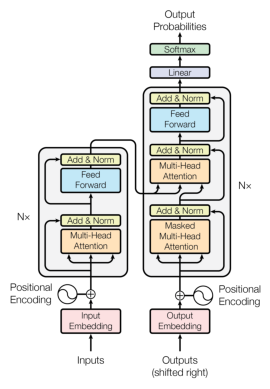

In [86]:
# load image and display
image = Image.open("data/images/page_2_image_0.png")

plt.imshow(image)
plt.axis("off")
plt.show()

Encoding an image into base64 is lossless, meaning that the image can be reconstructed exactly from the base64 string. This is useful.

In [89]:
import base64
from openai import OpenAI

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [92]:
decoded = base64.b64decode(encode_image('data/images/page_2_image_0.png'))

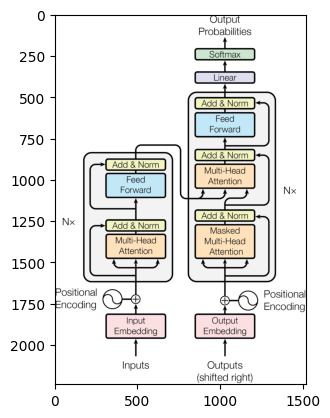

In [93]:
# plot bytes image
image = Image.open(io.BytesIO(decoded))
plt.imshow(image)

### Captions

We have 3 images here. Let's get captions for them.

We create a new template for this.

---
```jinja
You are an expert in image captioning. You will be shown an image and you will write a caption for it. The caption should be as detailed as possible.
```
---

In [95]:
caption_template = template_manager.render(
    'image_caption.jinja'
)

In [100]:
def image_input(image_path: str, prompt: str) -> str:
    base64_image = encode_image(image_path)

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt,
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url":  f"data:image/jpeg;base64,{base64_image}"
                        },
                    },
                ],
            }
        ],
    )

    return response

In [102]:
captions = []

# get image paths in data/images
image_paths = glob.glob("data/images/*.png")
for path in image_paths:
    response = image_input(path, caption_template)
    captions.append(response.choices[0].message.content)

print(captions[0])

The image depicts a flow chart illustrating steps in a computational process, possibly related to neural network operations or attention mechanisms. The process includes five steps, each represented by a colored rectangle with bold text. 

1. **MatMul**: The process starts with matrix multiplication, indicated by a purple rectangle labeled "MatMul."
2. **SoftMax**: The next step involves applying the softmax function, shown in a green rectangle labeled "SoftMax."
3. **Mask (opt.)**: An optional masking step follows, represented by a pink rectangle labeled "Mask (opt.)."
4. **Scale**: The process then involves scaling, depicted in a yellow rectangle labeled "Scale."
5. **MatMul**: Finally, another matrix multiplication is performed, shown once more in a purple rectangle labeled "MatMul."

The linear arrangement of these steps suggests a sequential data processing flow.
